# CNN Image Classification Laboration


Images used in this laboration are from CIFAR 10 (https://en.wikipedia.org/wiki/CIFAR-10). The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class. Your task is to make a classifier, using a convolutional neural network, that can correctly classify each image into the correct class.

You need to answer all questions in this notebook. 

## Part 1: What is a convolution

To understand a bit more about convolutions, we will first test the convolution function in scipy using a number of classical filters. 

Convolve the image with Gaussian filter, a Sobel X filter, and a Sobel Y filter, using the function 'convolve2d' in 'signal' from scipy.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

In a CNN, many filters are applied in each layer, and the filter coefficients are learned through back propagation (which is in contrast to traditional image processing, where the filters are designed by an expert).

In [3]:
# This cell is finished

from scipy import signal
import numpy as np

# Get a test image
from scipy import misc
image = misc.ascent()

# Define a help function for creating a Gaussian filter
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# Create Gaussian filter with certain size and standard deviation
gaussFilter = matlab_style_gauss2D((15,15),4)

# Define filter kernels for SobelX and Sobely
sobelX = np.array([[ 1, 0,  -1],
                    [2, 0, -2],
                    [1, 0, -1]]) 

sobelY = np.array([[ 1, 2,  1],
                    [0, 0, 0],
                    [-1, -2, -1]]) 

In [4]:
# Perform convolution using the function 'convolve2d' for the different filters
#filterResponseGauss = signal.convolve2d(image, gaussFilter, mode='same')
filterResponseGauss = signal.convolve2d(image, gaussFilter, mode='valid')
filterResponseSobelX = signal.convolve2d(image, sobelX, mode='valid')
filterResponseSobelY = signal.convolve2d(image, sobelY, mode='valid')

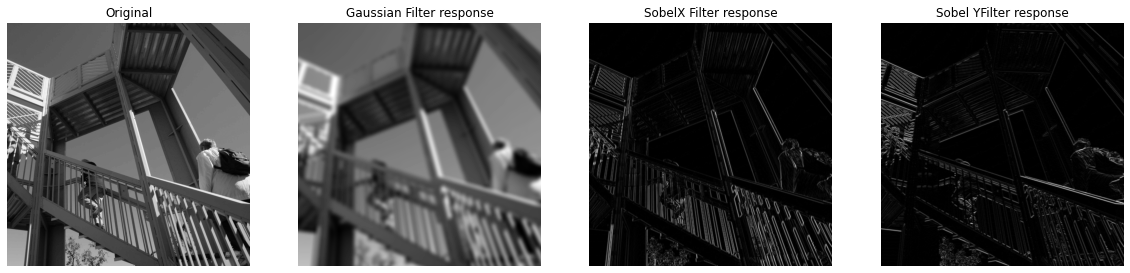

In [5]:
import matplotlib.pyplot as plt

# Show filter responses
fig, (ax_orig, ax_filt1, ax_filt2, ax_filt3) = plt.subplots(1, 4, figsize=(20, 6))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_filt1.imshow(np.absolute(filterResponseGauss), cmap='gray')
ax_filt1.set_title('Gaussian Filter response')
ax_filt1.set_axis_off()
ax_filt2.imshow(np.absolute(filterResponseSobelX), cmap='gray')
ax_filt2.set_title('SobelX Filter response')
ax_filt2.set_axis_off()
ax_filt3.imshow(np.absolute(filterResponseSobelY), cmap='gray')
ax_filt3.set_title('Sobel YFilter response')
ax_filt3.set_axis_off()

##  Part 2: Understanding convolutions

Question 1: What do the 3 different filters (Gaussian, SobelX, SobelY) do to the original image?

Answer: The Gaussian filter reduces the noise and makes the features more visible. It is a pre-processing step and leaves a blurring effect to the image. While the Sobel filters are used to highlight edges. It can be  horizontal or vertical edges, and it depends on how the weights are configured. Having the middle column as 0s will lead to the filter detecting vertical lines as shown in SobelX Filter response and having the middle row as 0s will lead to the filter detecting horizontal edges in SobelY.

Question 2: What is the size of the original image? How many channels does it have? How many channels does a color image normally have?

Anser: The original image is of size 512,512. It has 1 channel as it is a greyscale image. A color image usually will have 3 channels - r,g,b.

Question 3: What is the size of the different filters?

Answer: The size of the Gaussian filter is (15,15) - gaussFilter = matlab_style_gauss2D((15,15),4). Both the Sobel filters are of size (3,3).

Question 4: What is the size of the filter response if mode 'same' is used for the convolution ?

Answer: If mode 'same' is used, the filter response will be of the same size as the input, i.e. in this case 512,512

Question 5: What is the size of the filter response if mode 'valid' is used for the convolution? How does the size of the valid filter response depend on the size of the filter? 

Answer: If mode 'valid' is used, the size of the filter response will be smaller as this mode doesn't  rely on the zero padding. If N is the input size and K is the filter size, then the output is:

output size = N - K + 1

Question 6: Why are 'valid' convolutions a problem for CNNs with many layers?

Answer: The usage of valid mode shrinks the size of the output response, and may result in the lose of important features in the resulting feature map. With many layers, this behaviour is intensified and the feature maps in the last layers may become very small, and hence may not be able to capture the major significant feature.


In [6]:
# Your code for checking sizes of image and filter responses
print('The shape/size of the image is: ', image.shape)
print('The shape/size of the Gaussian Filter is: ', filterResponseGauss.shape)
print('The shape/size of the SobelX Filter is: ', filterResponseSobelX.shape)
print('The shape/size of the SobelY Filter is: ', filterResponseSobelY.shape)

The shape/size of the image is:  (512, 512)
The shape/size of the Gaussian Filter is:  (498, 498)
The shape/size of the SobelX Filter is:  (510, 510)
The shape/size of the SobelY Filter is:  (510, 510)


##  Part 3: Get a graphics card

Skip this part if you run on a CPU (recommended)

Let's make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming convolutions in every training iteration.

In [ ]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras.backend as K
import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

# Allow growth of GPU memory, otherwise it will always look like all the memory is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True) 

##  Part 4: How fast is the graphics card?

Question 7: Why are the filters used for a color image of size 7 x 7 x 3, and not 7 x 7 ? 

Answer: This is to account for the 3 channels required for the color images, i.e. r, g and b.

Question 8: What operation is performed by the 'Conv2D' layer? Is it a standard 2D convolution, as performed by the function signal.convolve2d we just tested?

Question 9: Do you think that a graphics card, compared to the CPU, is equally faster for convolving a batch of 1,000 images, compared to convolving a batch of 3 images? Motivate your answer.

Answer: In general, the graphics card are faster in comparison to the CPU as it has more number of of cores as compared to a CPU. This enables parallel computation on a larger scale in comparison to a CPU. For a batch of 1000 images, a graphic card would always trump over a CPU because of the more number of cores, but for a batch of 3 images, there may be considerable overhead in initializing the GPUs.

##  Part 5:  Load data
Time to make a 2D CNN. Load the images and labels from keras.datasets, this cell is already finished.

In [7]:
from keras.datasets import cifar10
import numpy as np

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Download CIFAR train and test data
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

print("Training images have size {} and labels have size {} ".format(Xtrain.shape, Ytrain.shape))
print("Test images have size {} and labels have size {} \n ".format(Xtest.shape, Ytest.shape))

# Reduce the number of images for training and testing to 10000 and 2000 respectively, 
# to reduce processing time for this laboration
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

Xtest = Xtest[0:2000]
Ytest = Ytest[0:2000]

Ytestint = Ytest

print("Reduced training images have size %s and labels have size %s " % (Xtrain.shape, Ytrain.shape))
print("Reduced test images have size %s and labels have size %s \n" % (Xtest.shape, Ytest.shape))

# Check that we have some training examples from each class
for i in range(10):
    print("Number of training examples for class {} is {}" .format(i,np.sum(Ytrain == i)))

Training images have size (50000, 32, 32, 3) and labels have size (50000, 1) 
Test images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
 
Reduced training images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
Reduced test images have size (2000, 32, 32, 3) and labels have size (2000, 1) 

Number of training examples for class 0 is 1005
Number of training examples for class 1 is 974
Number of training examples for class 2 is 1032
Number of training examples for class 3 is 1016
Number of training examples for class 4 is 999
Number of training examples for class 5 is 937
Number of training examples for class 6 is 1030
Number of training examples for class 7 is 1001
Number of training examples for class 8 is 1025
Number of training examples for class 9 is 981


##  Part 6: Plotting

Lets look at some of the training examples, this cell is already finished. You will see different examples every time you run the cell.

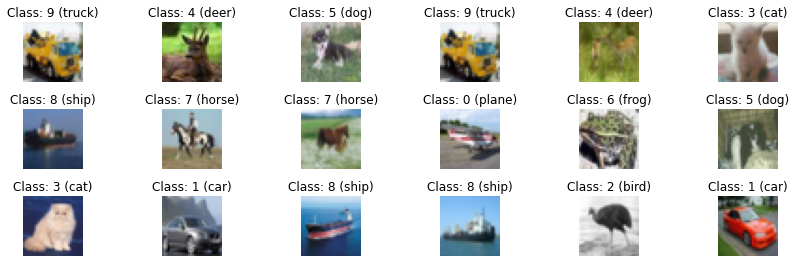

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for i in range(18):
    idx = np.random.randint(7500)
    label = Ytrain[idx,0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(Xtrain[idx])
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

##   Part 7: Split data into training, validation and testing
Split your training data into training (Xtrain, Ytrain) and validation (Xval, Yval), so that we have training, validation and test datasets (as in the previous laboration). We use a function in scikit learn. Use 25% of the data for validation.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [9]:
from sklearn.model_selection import train_test_split

# Your code for splitting the dataset
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, train_size=0.75, random_state=42)

# Print the size of training data, validation data and test data
print("Training images have size %s and labels have size %s " % (Xtrain.shape, Ytrain.shape))
print("Validation images have size %s and labels have size %s " % (Xval.shape, Yval.shape))
print("Test images have size %s and labels have size %s " % (Xtest.shape, Ytest.shape))

Training images have size (7500, 32, 32, 3) and labels have size (7500, 1) 
Validation images have size (2500, 32, 32, 3) and labels have size (2500, 1) 
Test images have size (2000, 32, 32, 3) and labels have size (2000, 1) 


##  Part 8: Preprocessing of images

Lets perform some preprocessing. The images are stored as uint8, i.e. 8 bit unsigned integers, but need to be converted to 32 bit floats. We also make sure that the range is -1 to 1, instead of 0 - 255. This cell is already finished.

In [10]:
# Convert datatype for Xtrain, Xval, Xtest, to float32
Xtrain = Xtrain.astype('float32')
Xval = Xval.astype('float32')
Xtest = Xtest.astype('float32')

# Change range of pixel values to [-1,1]
Xtrain = Xtrain / 127.5 - 1
Xval = Xval / 127.5 - 1
Xtest = Xtest / 127.5 - 1

##  Part 9: Preprocessing of labels

The labels (Y) need to be converted from e.g. '4' to "hot encoded", i.e. to a vector of type [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] . We use a function in Keras, see https://keras.io/api/utils/python_utils/#to_categorical-function

In [11]:
from tensorflow.keras.utils import to_categorical

# Print shapes before converting the labels
print(f"Shape of training before convertion {(Ytrain.shape)}" )
print(f"Shape of validation before convertion {(Yval.shape)}")
print(f"Shape of testing before convertion {(Ytest.shape)}")
# Your code for converting Ytrain, Yval, Ytest to categorical
Ytrain = to_categorical(Ytrain, num_classes=10)
Yval = to_categorical(Yval, num_classes=10)
Ytest = to_categorical(Ytest, num_classes=10)
# Print shapes after converting the labels
print(f"Shape of training after convertion {(Ytrain.shape)}" )
print(f"Shape of validation after convertion {(Yval.shape)}")
print(f"Shape of testing after convertion {(Ytest.shape)}")

Shape of training before convertion (7500, 1)
Shape of validation before convertion (2500, 1)
Shape of testing before convertion (2000, 1)
Shape of training after convertion (7500, 10)
Shape of validation after convertion (2500, 10)
Shape of testing after convertion (2000, 10)


##  Part 10: 2D CNN
Finish this code to create the image classifier, using a 2D CNN. Each convolutional layer will contain 2D convolution, batch normalization and max pooling. After the convolutional layers comes a flatten layer and a number of intermediate dense layers. The convolutional layers should take the number of filters as an argument, use a kernel size of 3 x 3, 'same' padding, and relu activation functions. The number of filters will double with each convolutional layer. The max pooling layers should have a pool size of 2 x 2. The intermediate dense layers before the final dense layer should take the number of nodes as an argument, use relu activation functions, and be followed by batch normalization. The final dense layer should have 10 nodes (= the number of classes in this laboration) and 'softmax' activation. Here we start with the Adam optimizer.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`Conv2D()`, performs 2D convolutions with a number of filters with a certain size (e.g. 3 x 3). 

`BatchNormalization()`, perform batch normalization

`MaxPooling2D()`, saves the max for a given pool size, results in down sampling

`Flatten()`, flatten a multi-channel tensor into a long vector

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

See https://keras.io/api/layers/core_layers/dense/ and https://keras.io/api/layers/reshaping_layers/flatten/ for information on how the `Dense()` and `Flatten()` functions work

See https://keras.io/layers/convolutional/ for information on how `Conv2D()` works

See https://keras.io/layers/pooling/ for information on how `MaxPooling2D()` works

Import a relevant cost function for multi-class classification from keras.losses (https://keras.io/losses/) , it relates to how many classes you have.

See the following links for how to compile, train and evaluate the model

https://keras.io/api/models/model_training_apis/#compile-method

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

In [12]:
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, 
              n_nodes=50, use_dropout=False, learning_rate=0.01):

    # Setup a sequential model
    model = Sequential()

    # Add first convolutional layer to the model, requires input shape
    model.add(Conv2D(n_filters, kernel_size=(3, 3),
                     padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Add remaining convolutional layers to the model, the number of filters should increase a factor 2 for each layer
    for i in range(n_conv_layers-1):
        n_filters = n_filters * 2
        model.add(Conv2D(n_filters, 
                         kernel_size=(3, 3), 
                         padding='same'))
        model.add(BatchNormalization())
        model.add(Activation(activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        
    # Add flatten layer
    model.add(Flatten())
    
    # Add intermediate dense layers
    for i in range(n_dense_layers):
        model.add(Dense(n_nodes))
        model.add(BatchNormalization())
        model.add(Activation(activation='relu'))
        if use_dropout:
            model.add(Dropout(0.5))
        
    # Add final dense layer
    model.add(Dense(10, activation='softmax'))

    # Compile model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), 
                  metrics=['accuracy'])

    return model

In [13]:
# Lets define a help function for plotting the training results
import matplotlib.pyplot as plt
def plot_results(history):
    
    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

## Part 11: Train 2D CNN

Time to train the 2D CNN, start with 2 convolutional layers, no intermediate dense layers, learning rate = 0.01. The first convolutional layer should have 16 filters (which means that the second convolutional layer will have 32 filters).

Relevant functions

`build_CNN`, the function we defined in Part 10, call it with the parameters you want to use

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See the following links for how to train and evaluate the model

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

## 2 convolutional layers, no intermediate dense layers

In [40]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model1 = build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, 
              n_nodes=50, use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history1 = model1.fit(x=Xtrain,
                      y=Ytrain,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose="auto",
                      validation_data = (Xval, Yval)
                     )

Epoch 1/20
75/75 [==============================] - 10s 128ms/step - loss: 3.5042 - accuracy: 0.2724 - val_loss: 1.9065 - val_accuracy: 0.3012
Epoch 2/20
75/75 [==============================] - 9s 119ms/step - loss: 1.6795 - accuracy: 0.3941 - val_loss: 1.7320 - val_accuracy: 0.3724
Epoch 3/20
75/75 [==============================] - 9s 125ms/step - loss: 1.5402 - accuracy: 0.4420 - val_loss: 1.6163 - val_accuracy: 0.4060
Epoch 4/20
75/75 [==============================] - 10s 137ms/step - loss: 1.3930 - accuracy: 0.5007 - val_loss: 1.5083 - val_accuracy: 0.4652
Epoch 5/20
75/75 [==============================] - 11s 142ms/step - loss: 1.2795 - accuracy: 0.5425 - val_loss: 1.3850 - val_accuracy: 0.5208
Epoch 6/20
75/75 [==============================] - 10s 131ms/step - loss: 1.1578 - accuracy: 0.5917 - val_loss: 1.3340 - val_accuracy: 0.5316
Epoch 7/20
75/75 [==============================] - 11s 154ms/step - loss: 1.0100 - accuracy: 0.6415 - val_loss: 1.3319 - val_accuracy: 0.5408
E

In [41]:
# Evaluate the trained model on test set, not used in training or validation
score = model1.evaluate(
    x=Xtest,
    y=Ytest,
    verbose="auto")
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 2.1268
Test accuracy: 0.5355


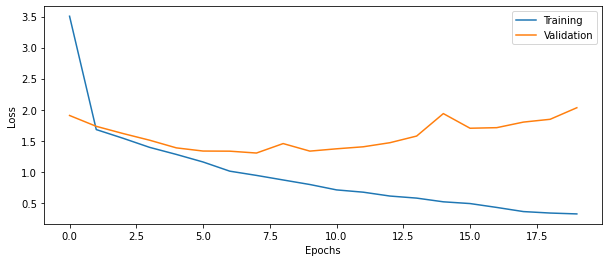

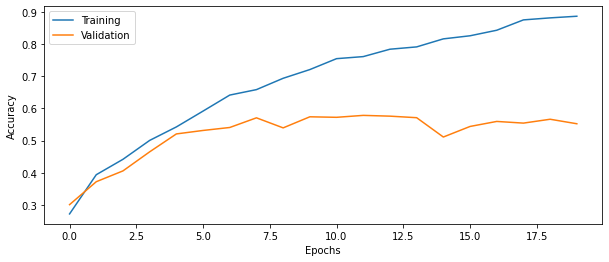

In [42]:
# Plot the history from the training run
plot_results(history1)

In [44]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 16)       64        
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 batch_normalization_2 (Batc  (None, 16, 16, 32)      

## Part 12: Improving performance

Write down the test accuracy, are you satisfied with the classifier performance (random chance is 10%) ? 

Question 10: How big is the difference between training and test accuracy?

Answer: There is almost more than 30% difference between test and training accuracy.

Question 11: For the DNN laboration we used a batch size of 10,000, why do we need to use a smaller batch size in this laboration?

Answer: In DNN, the most complex model had almost 12k parameters, but as shown above a simple CNN model has double the number of parameters. Also, since the data has more dimensions, like the additional channels, there is a necessity to store intermediate feature maps.  Hence, it is not advisable to use a large batch size for CNN models due to memory constraints.

## 2 convolutional layers, 1 intermediate dense layer (50 nodes)

In [43]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model2 = build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=1, 
              n_nodes=50, use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history2 = model2.fit(x=Xtrain,
                      y=Ytrain,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose="auto",
                      validation_data = (Xval, Yval)
                     )

Epoch 1/20
75/75 [==============================] - 11s 140ms/step - loss: 1.5851 - accuracy: 0.4329 - val_loss: 1.4392 - val_accuracy: 0.4892
Epoch 2/20
75/75 [==============================] - 9s 126ms/step - loss: 1.1926 - accuracy: 0.5741 - val_loss: 1.6673 - val_accuracy: 0.4304
Epoch 3/20
75/75 [==============================] - 10s 128ms/step - loss: 0.9840 - accuracy: 0.6465 - val_loss: 1.4230 - val_accuracy: 0.5080
Epoch 4/20
75/75 [==============================] - 9s 119ms/step - loss: 0.8035 - accuracy: 0.7155 - val_loss: 1.3908 - val_accuracy: 0.5464
Epoch 5/20
75/75 [==============================] - 9s 124ms/step - loss: 0.6373 - accuracy: 0.7756 - val_loss: 1.6855 - val_accuracy: 0.5556
Epoch 6/20
75/75 [==============================] - 9s 123ms/step - loss: 0.4717 - accuracy: 0.8353 - val_loss: 1.6528 - val_accuracy: 0.5644
Epoch 7/20
75/75 [==============================] - 9s 120ms/step - loss: 0.3732 - accuracy: 0.8701 - val_loss: 1.6933 - val_accuracy: 0.5560
Epoc

In [51]:
# Evaluate the trained model on test set, not used in training or validation
score = model2.evaluate(
    x=Xtest,
    y=Ytest,
    verbose="auto")
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 2.8784
Test accuracy: 0.5665


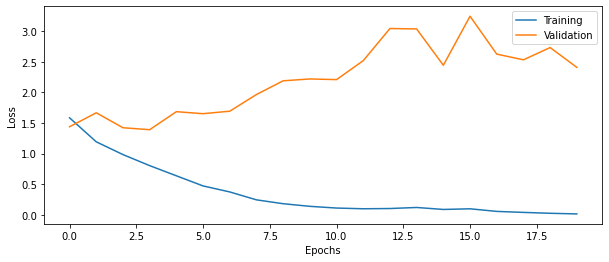

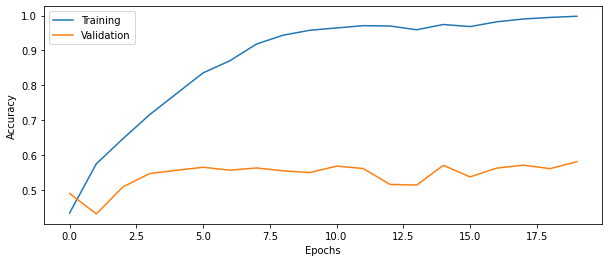

In [45]:
# Plot the history from the training run
plot_results(history2)

## 4 convolutional layers, 1 intermediate dense layer (50 nodes)

In [46]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model3 = build_CNN(input_shape, n_conv_layers=4, n_filters=16, n_dense_layers=1, 
              n_nodes=50, use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history3 = model3.fit(x=Xtrain,
                      y=Ytrain,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose="auto",
                      validation_data = (Xval, Yval)
                     )

Epoch 1/20
75/75 [==============================] - 13s 167ms/step - loss: 1.6756 - accuracy: 0.3817 - val_loss: 2.2649 - val_accuracy: 0.3048
Epoch 2/20
75/75 [==============================] - 13s 173ms/step - loss: 1.3355 - accuracy: 0.5083 - val_loss: 2.2297 - val_accuracy: 0.3276
Epoch 3/20
75/75 [==============================] - 13s 175ms/step - loss: 1.1583 - accuracy: 0.5753 - val_loss: 1.8266 - val_accuracy: 0.4372
Epoch 4/20
75/75 [==============================] - 13s 169ms/step - loss: 1.0069 - accuracy: 0.6393 - val_loss: 1.4673 - val_accuracy: 0.5148
Epoch 5/20
75/75 [==============================] - 14s 185ms/step - loss: 0.8713 - accuracy: 0.6840 - val_loss: 1.3882 - val_accuracy: 0.5452
Epoch 6/20
75/75 [==============================] - 12s 166ms/step - loss: 0.7277 - accuracy: 0.7407 - val_loss: 1.5319 - val_accuracy: 0.5428
Epoch 7/20
75/75 [==============================] - 13s 177ms/step - loss: 0.6035 - accuracy: 0.7859 - val_loss: 1.4931 - val_accuracy: 0.5556

In [48]:
# Evaluate the trained model on test set, not used in training or validation
score = model3.evaluate(
    x=Xtest,
    y=Ytest,
    verbose="auto")
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 2.5824
Test accuracy: 0.5900


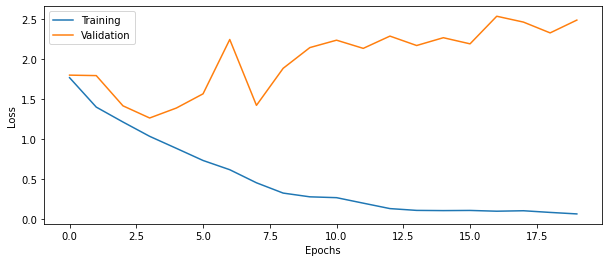

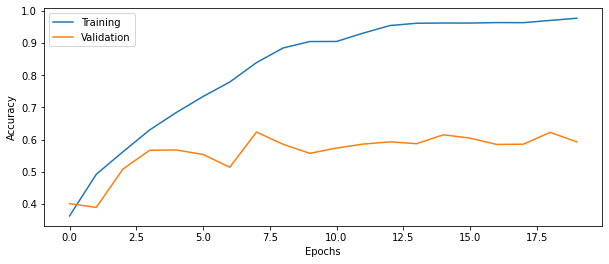

In [55]:
# Plot the history from the training run
plot_results(history3)

##  Part 13: Plot the CNN architecture

To understand your network better, print the architecture using `model.summary()`

Question 12: How many trainable parameters does your network have? Which part of the network contains most of the parameters?

Answer: There are around 124k trainable parameters. The convolutional part has the most number of parametes, ~100k parameters.

Question 13: What is the input to and output of a Conv2D layer? What are the dimensions of the input and output? 

Answer: The input to the 1st Conv2D layer will have the same shape as the training input, i.e. (32,32,3). The output will have the same size, but the number of filters will be equal to n_filters we passed to the build_CNN function. In the subsequent Conv2D layers, the number of filters are doubled.

Question 14: Is the batch size always the first dimension of each 4D tensor? Check the documentation for Conv2D, https://keras.io/layers/convolutional/

Answer: Yes, the first dimension of each 4D tensor is always the batch size, for e.g.(batch_size, height, width, channels).

Question 15: If a convolutional layer that contains 128 filters is applied to an input with 32 channels, what is the number of channels in the output?

Answer: Assuming that the padding is same, in each consequent Conv2D layer, the number of channels will be the same as the number of filters, in this case 128 channels.

Question 16: Why is the number of parameters in each Conv2D layer *not* equal to the number of filters times the number of filter coefficients per filter (plus biases)?

Answer: ???

Question 17: How does MaxPooling help in reducing the number of parameters to train?

Answer: MaxPooling helps in reducing number of parameters by downsampling the feature maps while also retaining the most important features. This helps in reducing the risk of overfitting.

In [56]:
# Print network architecture

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 batch_normalization_6 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                      

##  Part 14: Dropout regularization

Add dropout regularization between each intermediate dense layer, dropout probability 50%.

Question 18: How much did the test accuracy improve with dropout, compared to without dropout?

Answer: The test accuracy has a negligible improvement of 1% with the use of dropout.

Question 19: What other types of regularization can be applied? How can you add L2 regularization for the convolutional layers?

Answer: The following  types of regularization can be applied:

1. L1

2. L2

3. L1L2

4. Orthogonal regularizer

In the Conv2D layer, we can specify kernel_regularizer=regularizers.L2(0.01) to setup L2 regularization.

## 4 convolutional layers, 1 intermediate dense layer (50 nodes), dropout

In [49]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model4 = build_CNN(input_shape, n_conv_layers=4, n_filters=16, n_dense_layers=1, 
              n_nodes=50, use_dropout=True, learning_rate=0.01)

# Train the model  using training data and validation data
history4 = model4.fit(x=Xtrain,
                      y=Ytrain,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose="auto",
                      validation_data = (Xval, Yval)
                     )

Epoch 1/20
75/75 [==============================] - 15s 171ms/step - loss: 1.8909 - accuracy: 0.2984 - val_loss: 2.3889 - val_accuracy: 0.2952
Epoch 2/20
75/75 [==============================] - 13s 174ms/step - loss: 1.5598 - accuracy: 0.4189 - val_loss: 1.9151 - val_accuracy: 0.3616
Epoch 3/20
75/75 [==============================] - 13s 174ms/step - loss: 1.4063 - accuracy: 0.4881 - val_loss: 2.5266 - val_accuracy: 0.3356
Epoch 4/20
75/75 [==============================] - 13s 170ms/step - loss: 1.3037 - accuracy: 0.5181 - val_loss: 1.3566 - val_accuracy: 0.5068
Epoch 5/20
75/75 [==============================] - 13s 171ms/step - loss: 1.2012 - accuracy: 0.5661 - val_loss: 1.5248 - val_accuracy: 0.4664
Epoch 6/20
75/75 [==============================] - 13s 175ms/step - loss: 1.1229 - accuracy: 0.5944 - val_loss: 1.3685 - val_accuracy: 0.5564
Epoch 7/20
75/75 [==============================] - 13s 174ms/step - loss: 1.0653 - accuracy: 0.6197 - val_loss: 2.3917 - val_accuracy: 0.3740

In [56]:
# Evaluate the trained model on test set, not used in training or validation
score = model4.evaluate(
    x=Xtest,
    y=Ytest,
    verbose="auto")
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 1.9571
Test accuracy: 0.5980


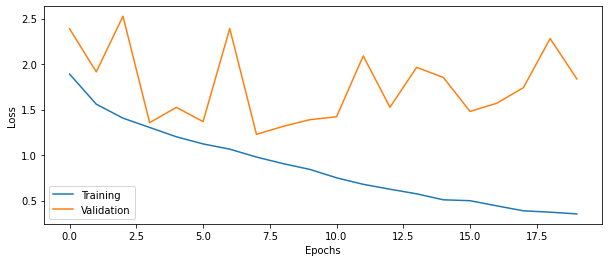

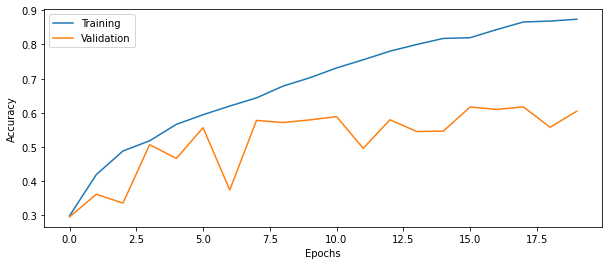

In [51]:
# Plot the history from the training run
plot_results(history4)

##  Part 15: Tweaking performance

You have now seen the basic building blocks of a 2D CNN. To further improve performance involves changing the number of convolutional layers, the number of filters per layer, the number of intermediate dense layers, the number of nodes in the intermediate dense layers, batch size, learning rate, number of epochs, etc. Spend some time (30 - 90 minutes) testing different settings.

Question 20: How high test accuracy can you obtain? What is your best configuration?

Answer: The highest test accuracy we are able to achieve is around 61%. The best config is as shown below:

batch_size = 200, epochs = 20, n_conv_layers=4, n_filters=32, n_dense_layers=1, n_nodes=100, use_dropout=True, learning_rate=0.01


## Your best config

In [52]:
# Setup some training parameters
batch_size = 200
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
#model5 = build_CNN(input_shape, n_conv_layers=4, n_filters=16, n_dense_layers=1, 
#              n_nodes=50, use_dropout=True, learning_rate=0.01)
model5 = build_CNN(input_shape, n_conv_layers=4, n_filters=32, n_dense_layers=1, 
              n_nodes=100, use_dropout=True, learning_rate=0.01)

# Train the model  using training data and validation data
history5 = model5.fit(x=Xtrain,
                      y=Ytrain,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose="auto",
                      validation_data = (Xval, Yval)
                     )

Epoch 1/20
38/38 [==============================] - 32s 817ms/step - loss: 1.9752 - accuracy: 0.2887 - val_loss: 9.0345 - val_accuracy: 0.1076
Epoch 2/20
38/38 [==============================] - 32s 844ms/step - loss: 1.5611 - accuracy: 0.4219 - val_loss: 3.4070 - val_accuracy: 0.1984
Epoch 3/20
38/38 [==============================] - 33s 874ms/step - loss: 1.4001 - accuracy: 0.4861 - val_loss: 1.6087 - val_accuracy: 0.4304
Epoch 4/20
38/38 [==============================] - 33s 865ms/step - loss: 1.2642 - accuracy: 0.5341 - val_loss: 1.7986 - val_accuracy: 0.3876
Epoch 5/20
38/38 [==============================] - 32s 852ms/step - loss: 1.1567 - accuracy: 0.5824 - val_loss: 1.7759 - val_accuracy: 0.4532
Epoch 6/20
38/38 [==============================] - 32s 837ms/step - loss: 1.0516 - accuracy: 0.6201 - val_loss: 1.7774 - val_accuracy: 0.4492
Epoch 7/20
38/38 [==============================] - 33s 870ms/step - loss: 0.9596 - accuracy: 0.6531 - val_loss: 1.5803 - val_accuracy: 0.5096

In [57]:
# Evaluate the trained model on test set, not used in training or validation
score = model5.evaluate(
    x=Xtest,
    y=Ytest,
    verbose="auto")
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 1.8496
Test accuracy: 0.6115


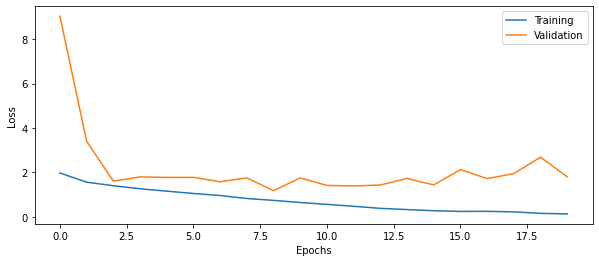

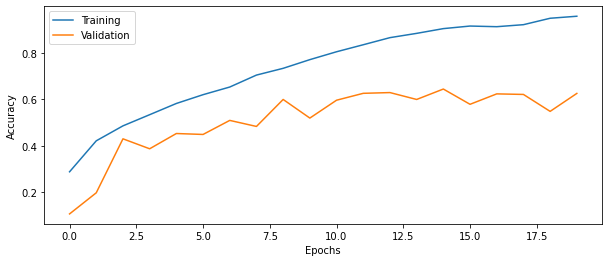

In [58]:
# Plot the history from the training run
plot_results(history5)

##  Part 16: Rotate the test images

How high is the test accuracy if we rotate the test images? In other words, how good is the CNN at generalizing to rotated images?

Rotate each test image 90 degrees, the cells are already finished.

Question 21: What is the test accuracy for rotated test images, compared to test images without rotation? Explain the difference in accuracy.

Answer: We are getting ??? accuracy for rotated test images in comaprison to the ones without rotation. This is because, the model has been trained only on images withut rotation, and hence generalizes poorly when presented with rotated/augmented images.

In [15]:
def myrotate(images):

    images_rot = np.rot90(images, axes=(1,2))
    
    return images_rot

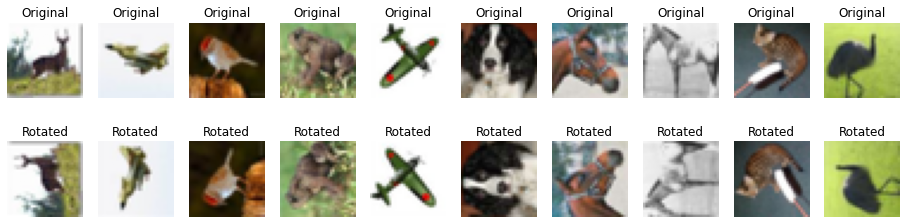

In [16]:
# Rotate the test images 90 degrees
Xtest_rotated = myrotate(Xtest)

# Look at some rotated images
plt.figure(figsize=(16,4))
for i in range(10):
    idx = np.random.randint(500)
    
    plt.subplot(2,10,i+1)
    plt.imshow(Xtest[idx]/2+0.5)
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(2,10,i+11)
    plt.imshow(Xtest_rotated[idx]/2+0.5)
    plt.title("Rotated")
    plt.axis('off')
plt.show()


In [61]:
# Evaluate the trained model on rotated test set
score = model5.evaluate(
    x=Xtest_rotated,
    y=Ytest,
    verbose="auto")
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 5.9699
Test accuracy: 0.2230


##  Part 17: Augmentation using Keras `ImageDataGenerator`

We can increase the number of training images through data augmentation (we now ignore that CIFAR10 actually has 60 000 training images). Image augmentation is about creating similar images, by performing operations such as rotation, scaling, elastic deformations and flipping of existing images. This will prevent overfitting, especially if all the training images are in a certain orientation.

We will perform the augmentation on the fly, using a built-in function in Keras, called `ImageDataGenerator`

See https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator , the .flow(x,y) functionality

Make sure to use different subsets for training and validation when you setup the flows, otherwise you will validate on the same data...

In [17]:
# Get all 60 000 training images again. ImageDataGenerator manages validation data on its own
(Xtrain, Ytrain), _ = cifar10.load_data()

# Reduce number of images to 10,000
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

# Change data type and rescale range
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain / 127.5 - 1

# Convert labels to hot encoding
Ytrain = to_categorical(Ytrain, 10)

In [18]:
# Set up a data generator with on-the-fly data augmentation, 20% validation split
# Use a rotation range of 30 degrees, horizontal and vertical flipping
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    validation_split=0.2,
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip=True)

# Setup a flow for training data, assume that we can fit all images into CPU memory
train_flow = datagen.flow(
    Xtrain,
    Ytrain,
    #batch_size=8,
    subset='training'
)

# Setup a flow for validation data, assume that we can fit all images into CPU memory
val_flow = datagen.flow(
    Xtrain,
    Ytrain,
    #batch_size=8,
    subset='validation'
)

## Part 18: What about big data?

Question 22: How would you change the code for the image generator if you cannot fit all training images in CPU memory? What is the disadvantage of doing that change?

Answer: If we cannot fit all the training images in the CPU memory, we can stream the images directly from local directory using the flow_from_directory function under datagen. 

train_generator = train_datagen.flow_from_directory('<Directory path>', target_size=(150, 150), batch_size=32, class_mode='binary')

Similary, we can do the same for validation.

The disadvantage of doing this is that it slows down the training process considerably due to the I/O overhead reads from the local disk.

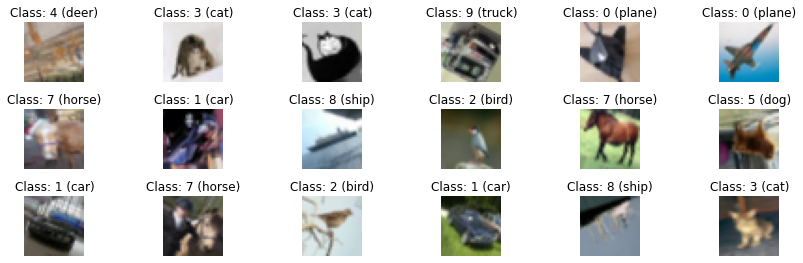

In [19]:
# Plot some augmented images
plot_datagen = datagen.flow(Xtrain, Ytrain, batch_size=1)

plt.figure(figsize=(12,4))
for i in range(18):
    (im, label) = plot_datagen.next()
    im = (im[0] + 1) * 127.5
    im = im.astype('int')
    label = np.flatnonzero(label)[0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

## Part 19: Train the CNN with images from the generator

See https://keras.io/api/models/model_training_apis/#fit-method for how to use model.fit with a generator instead of a fix dataset (numpy arrays)

To make the comparison fair to training without augmentation

    steps_per_epoch should be set to: len(Xtrain)*(1 - validation_split)/batch_size

    validation_steps should be set to: len(Xtrain)*validation_split/batch_size
    
This is required since with a generator, the fit function will not know how many examples your original dataset has.

Question 23: How quickly is the training accuracy increasing compared to without augmentation? Explain why there is a difference compared to without augmentation. We are here talking about the number of training epochs required to reach a certain accuracy, and not the training time in seconds. What parameter is necessary to change to perform more training?

Answer: For the best model config, the training accuracy without the augmented data reached ~60% at 6th epoch, while the training accuracy using the augmented data reached only ~30% at the 6th epoch. This is because the model with augmented data gets to see more variety of images, and training with such variety of images takes more epochs to reach good accuracy. ???

Question 24: What other types of image augmentation can be applied, compared to what we use here?

Answer: We can use other techniques like, image scaling, blurring the images, adding noise to it, training images taken from different cameras.

In [20]:
# Setup some training parameters
batch_size = 100
epochs = 200
input_shape = Xtrain.shape[1:]

# Build model (your best config)
model6 = build_CNN(input_shape, n_conv_layers=4, n_filters=32, n_dense_layers=1, 
              n_nodes=100, use_dropout=True, learning_rate=0.01)

validation_split=0.2
steps_per_epoch = len(Xtrain)*(1 - validation_split)/batch_size
validation_steps = len(Xtrain)*validation_split/batch_size
    
# Train the model using on the fly augmentation
history6 = model6.fit(train_flow,
                      steps_per_epoch=steps_per_epoch,
                      epochs=epochs,
                      verbose="auto",
                      validation_data=val_flow,
                      validation_steps=validation_steps
                     )

Epoch 1/200
80/80 [==============================] - 18s 204ms/step - loss: 2.2965 - accuracy: 0.1980 - val_loss: 3.3866 - val_accuracy: 0.1453
Epoch 2/200
80/80 [==============================] - 15s 191ms/step - loss: 2.0054 - accuracy: 0.2555 - val_loss: 3.0560 - val_accuracy: 0.1516
Epoch 3/200
80/80 [==============================] - 15s 189ms/step - loss: 1.9020 - accuracy: 0.3125 - val_loss: 1.7098 - val_accuracy: 0.3578
Epoch 4/200
80/80 [==============================] - 15s 193ms/step - loss: 1.8541 - accuracy: 0.3313 - val_loss: 1.8555 - val_accuracy: 0.3297
Epoch 5/200
80/80 [==============================] - 16s 195ms/step - loss: 1.7689 - accuracy: 0.3488 - val_loss: 2.7002 - val_accuracy: 0.2203
Epoch 6/200
80/80 [==============================] - 15s 190ms/step - loss: 1.7160 - accuracy: 0.3594 - val_loss: 1.9049 - val_accuracy: 0.3313
Epoch 7/200
80/80 [==============================] - 16s 195ms/step - loss: 1.7133 - accuracy: 0.3594 - val_loss: 1.8068 - val_accuracy:

In [21]:
# Check if there is still a big difference in accuracy for original and rotated test images

# Evaluate the trained model on original test set
score = model6.evaluate(Xtest, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Evaluate the trained model on rotated test set
score = model6.evaluate(Xtest_rotated, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 1.0849
Test accuracy: 0.6520
Test loss: 2.4797
Test accuracy: 0.3320


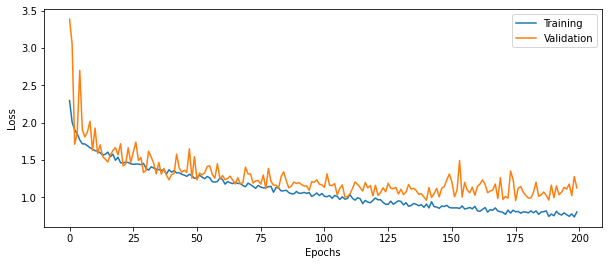

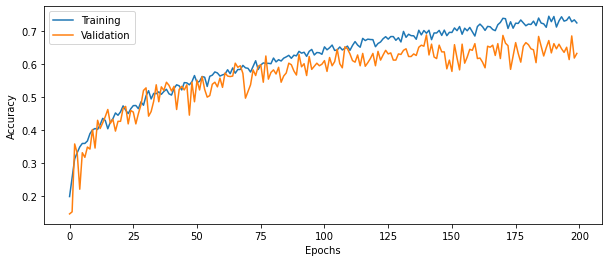

In [22]:
# Plot the history from the training run
plot_results(history6)

## Part 20: Plot misclassified images

Lets plot some images where the CNN performed badly, these cells are already finished.

In [23]:
# Find misclassified images
y_pred=model6.predict(Xtest) 
y_pred=np.argmax(y_pred,axis=1)

y_correct = np.argmax(Ytest,axis=-1)

miss = np.flatnonzero(y_correct != y_pred)

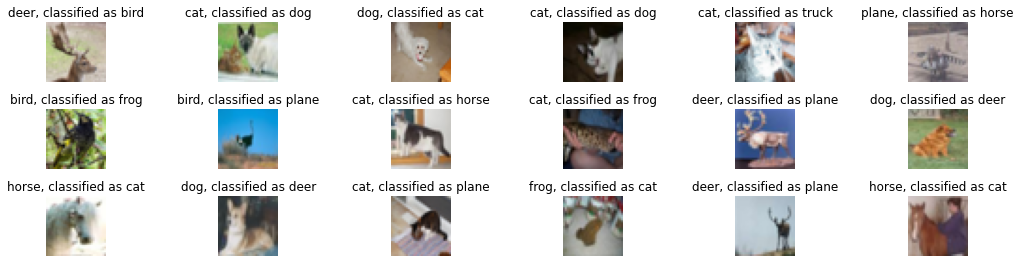

In [24]:
# Plot a few of them
plt.figure(figsize=(15,4))
perm = np.random.permutation(miss)
for i in range(18):
    im = (Xtest[perm[i]] + 1) * 127.5
    im = im.astype('int')
    label_correct = y_correct[perm[i]]
    label_pred = y_pred[perm[i]]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.axis('off')
    plt.title("{}, classified as {}".format(classes[label_correct], classes[label_pred]))
plt.show()

##  Part 21: Testing on another size

Question 25: This CNN has been trained on 32 x 32 images, can it be applied to images of another size? If not, why is this the case?

Answer: No, applying this model on images of other sizes will give poor results as the architecture is suited for the images of size 32 * 32. If we have bigger images, then we would need to train more parameters to get good result.

Question 26: Is it possible to design a CNN that can be trained on images of one size, and then applied to an image of any size? How?

Answer: ???

##  Part 22: Pre-trained 2D CNNs

There are many deep 2D CNNs that have been pre-trained using the large ImageNet database (several million images, 1000 classes). Import a pre-trained ResNet50 network from Keras applications. Show the network using `model.summary()`

Question 27: How many convolutional layers does ResNet50 have? 

Answers: There are 48 convvolutional layers in ResNet50 with 1 Maxpool and 1 average pool layer.

Question 28: How many trainable parameters does the ResNet50 network have? 

Answer: There are 25.5M trainable parameters.

Question 29: What is the size of the images that ResNet50 expects as input?

Answer: ResNet50 expects images of size 224 * 224 * 3 for color images.

Question 30: Using the answer to question 28, explain why the second derivative is seldom used when training deep networks.

Answer: This is because for the second derivative, the hessian matrix of dimension 25M * 25M will have to be maintained.

Apply the pre-trained CNN to 5 random color images that you download and copy to the cloud machine or your own computer. Are the predictions correct? How certain is the network of each image class?

These pre-trained networks can be fine tuned to your specific data, and normally only the last layers need to be re-trained, but it will still be too time consuming to do in this laboration.

See https://keras.io/api/applications/ and https://keras.io/api/applications/resnet/#resnet50-function 

Useful functions

`image.load_img` in tensorflow.keras.preprocessing

`image.img_to_array` in tensorflow.keras.preprocessing

`ResNet50` in tensorflow.keras.applications.resnet50

`preprocess_input` in tensorflow.keras.applications.resnet50

`decode_predictions` in tensorflow.keras.applications.resnet50

`expand_dims` in numpy


In [54]:
# Your code for using pre-trained ResNet 50 on 5 color images of your choice. 
# The preprocessing should transform the image to a size that is expected by the CNN.

import tensorflow.keras.applications.resnet50 as resnet
import tensorflow.keras.preprocessing.image as image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = resnet.ResNet50(weights='imagenet')
img_path = 'TrafficLight.jpg'

# Load the image and preprocess it
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n03595614', 'jersey', 0.21667668), ('n03291819', 'envelope', 0.18706775), ('n02786058', 'Band_Aid', 0.06349503)]


In [55]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           